In [3]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
df = pd.read_csv("german.data", sep = "\s+",index_col = False, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
df.columns = ["Status of existing checking account",
                   "Duration in month",
                   "Credit history",
                   "Purpose",
                   "Credit amount",
                   "Savings account/bonds",
                   "Present employment since",
                   "Installment rate in percentage of disposable income",
                   "Personal status and sex",
                   "Other debtors / guarantors",
                   "Present residence since",
                   "Property",
                   "Age in years",
                   "Other installment plans",
                   "Housing",
                   "Number of existing credits at this bank",
                   "Job",
                   "Number of people being liable to provide maintenance for",
                   "Telephone",
                   "foreign worker",
                   "Customer quality result"
                   ]

In [7]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Customer quality result
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
label = df['Customer quality result']
df.drop('Customer quality result',axis=1, inplace=True)

In [9]:
df['Status of existing checking account'] = df['Status of existing checking account'].map({'A11': 1, 'A12': 2, 'A13': 3,'A14': 4})
df['Credit history'] = df['Credit history'].map({'A30': 0, 'A31': 1, 'A32': 2,'A33': 3,'A34': 4})
df['Purpose'] = df['Purpose'].map({'A40': 0, 'A41': 1, 'A42': 2,'A43': 3,'A44': 4,'A45': 5,'A46': 6,'A47': 7,'A48': 8,'A49': 9,'A410': 10})
df['Savings account/bonds'] = df['Savings account/bonds'].map({'A61': 1, 'A62': 2, 'A63': 3,'A64': 4,'A65': 5})
df['Present employment since'] = df['Present employment since'].map({'A71': 1, 'A72': 2, 'A73': 3,'A74': 4,'A75': 5})
df['Personal status and sex'] = df['Personal status and sex'].map({'A91': 1, 'A92': 2, 'A93': 3,'A94': 4,'A95': 5})
df['Other debtors / guarantors'] = df['Other debtors / guarantors'].map({'A101': 1, 'A102': 2, 'A103': 3})
df['Property'] = df['Property'].map({'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4})
df['Other installment plans'] = df['Other installment plans'].map({'A141': 1, 'A142': 2, 'A143': 3})
df['Housing'] = df['Housing'].map({'A151': 1, 'A152': 2, 'A153': 3})
df['Job'] = df['Job'].map({'A171': 1, 'A172': 2, 'A173': 3,  'A174': 4})
df['Telephone'] = df['Telephone'].map({'A191': 1, 'A192': 2})
df['foreign worker'] = df['foreign worker'].map({'A201': 1, 'A202': 2})

In [10]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1,6,4,3,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1
1,2,48,2,3,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1
2,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1
3,1,42,2,2,7882,1,4,2,3,3,4,2,45,3,3,1,3,2,1,1
4,1,24,3,0,4870,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1


In [11]:
df['Duration in month'] = df['Duration in month'].sub(df['Duration in month'].min()).div((df['Duration in month'].max() - df['Duration in month'].min()))
df['Credit amount'] = df['Credit amount'].sub(df['Credit amount'].min()).div((df['Credit amount'].max() - df['Credit amount'].min()))
df['Age in years'] = df['Age in years'].sub(df['Age in years'].min()).div((df['Age in years'].max() - df['Age in years'].min()))

df['Duration in month']= df['Duration in month'].round(2)
df['Credit amount'] = df['Credit amount'].round(2)
df['Age in years'] = df['Age in years'].round(2)

In [12]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1,0.03,4,3,0.05,5,5,4,3,1,4,1,0.86,3,2,2,3,1,2,1
1,2,0.65,2,3,0.31,1,3,2,2,1,2,1,0.05,3,2,1,3,1,1,1
2,4,0.12,4,6,0.10,1,4,2,3,1,3,1,0.54,3,2,1,2,2,1,1
3,1,0.56,2,2,0.42,1,4,2,3,3,4,2,0.46,3,3,1,3,2,1,1
4,1,0.29,3,0,0.25,1,3,3,3,1,4,4,0.61,3,3,2,3,2,1,1


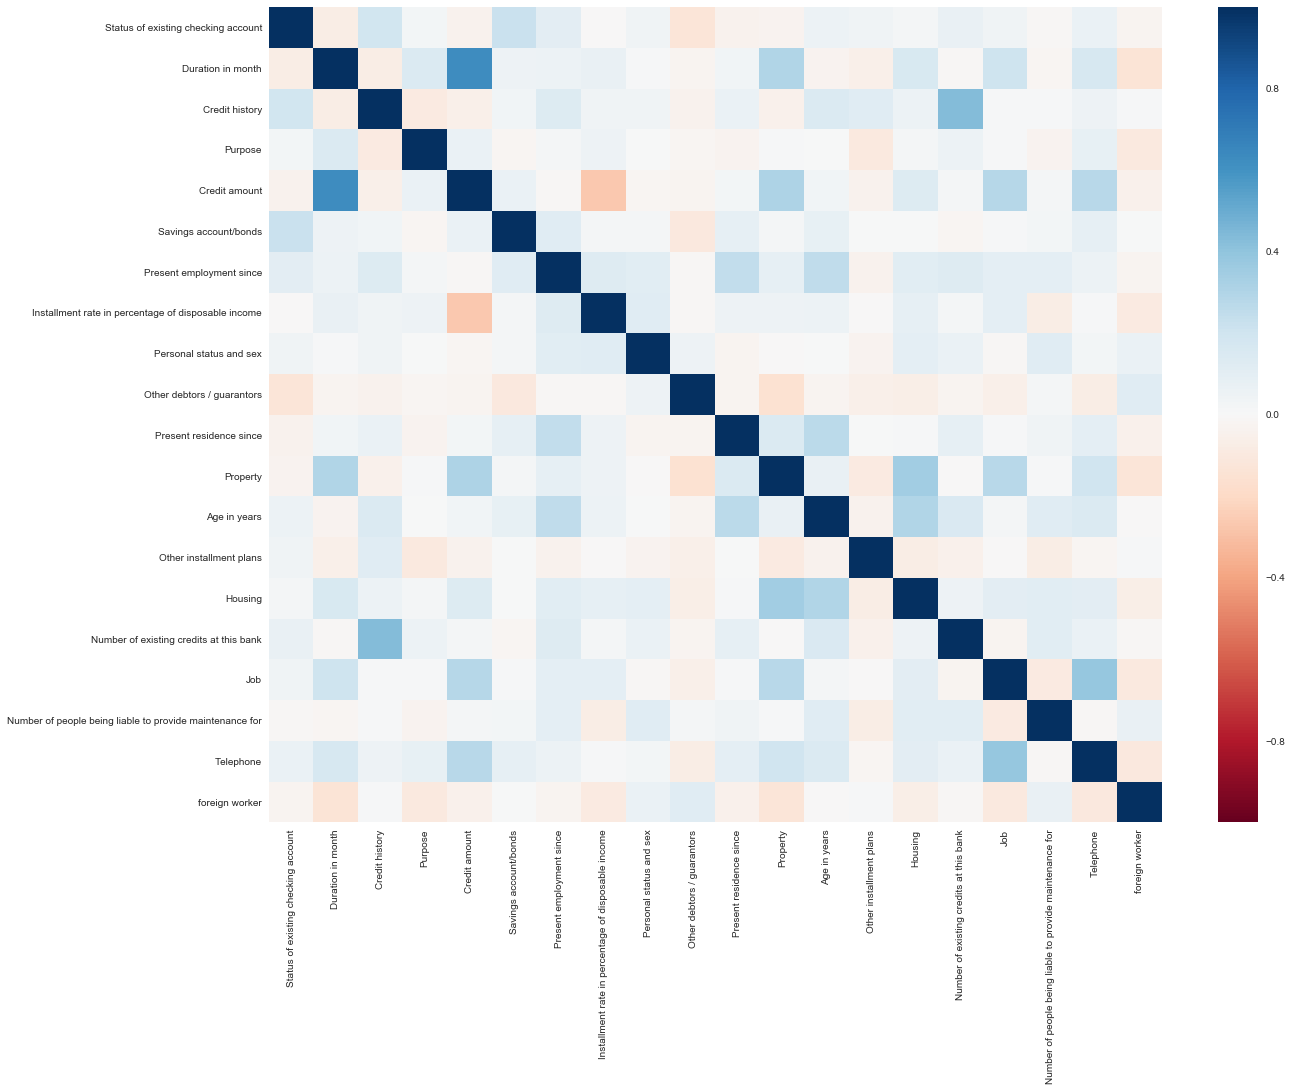

In [13]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,cmap="RdBu")
plt.show()


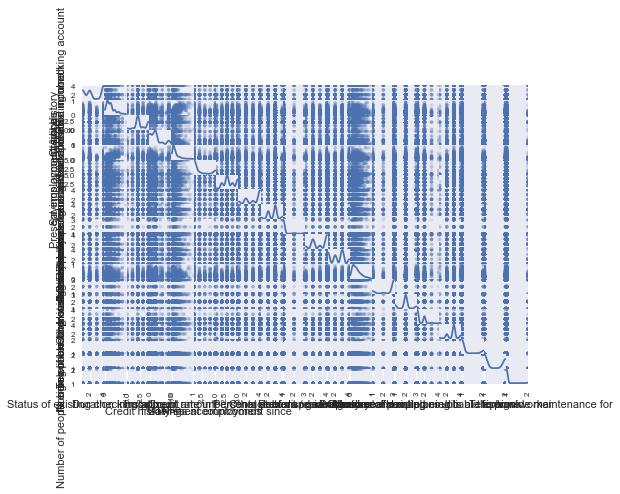

In [14]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(20,20))
scatter_matrix(df, alpha=0.2, diagonal='kde')
plt.show()

In [15]:
train_df, test_df, train_label, test_label = train_test_split(
df, label, test_size=0.2, random_state=0)

In [16]:
train_df.shape, train_label.shape

((800, 20), (800,))

In [17]:
test_df.shape, test_label.shape

((200, 20), (200,))

In [18]:
model = KNeighborsClassifier(n_neighbors=32)
model.fit(train_df, train_label.values.ravel())
predictions = model.predict(test_df)
# KNN prediction Score
print("KNN Prediction Score: ",metrics.accuracy_score(test_label, predictions))


KNN Prediction Score:  0.755


In [19]:
from sklearn.cross_validation import cross_val_score,cross_val_predict

C:\Users\samsung\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
scores = cross_val_score(model, train_df, train_label, cv=10)
scores,scores.mean()

(array([ 0.7654321 ,  0.77777778,  0.725     ,  0.8375    ,  0.7125    ,
         0.7625    ,  0.775     ,  0.7375    ,  0.7721519 ,  0.74683544]),
 0.76121972183153608)

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()
model.fit(train_df, train_label.values.ravel())
predictions = model.predict(test_df)
# KNN prediction Score
print("LR Prediction Score: ",metrics.accuracy_score(test_label, predictions))

LR Prediction Score:  0.735


In [24]:
scores = cross_val_score(model, train_df, train_label, cv=10)
scores,scores.mean()

(array([ 0.77777778,  0.7654321 ,  0.7625    ,  0.7125    ,  0.75      ,
         0.7875    ,  0.7875    ,  0.7       ,  0.79746835,  0.82278481]),
 0.76634630411001725)

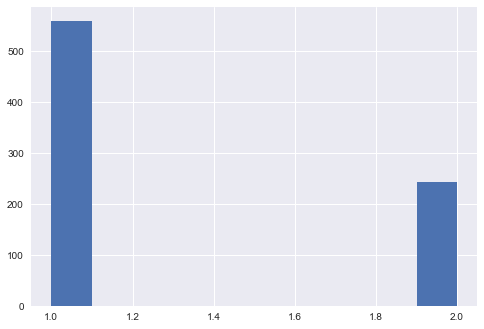

In [29]:
train_label.hist()